In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import os
import re
import imutils
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import tqdm
from iteration_utilities import grouper

In [2]:
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]


In [3]:
path = '/mnt/holomonitor-pvc/finalprojecttest/'

time = []


n = list(range(1,5))

li = ['B3','D5','D6','F10','C6','F11','D11','G4','F2','G10','G5','B10','G3','B8','E4','G6','G8','D10','E7','B7','E10','B11','D8','B2']


time_points = list(map(str, range(0,97, 10)))

new_time = []
for i in time_points:
    r = ' ' + i + '.'
    new_time.append(r)


for dirname, dirnames,filenames in os.walk(path):
    
    for filename in sorted(filenames, key = natural_keys):
        
        for index in n:
            for le in li:
                for t in new_time:
                    if '{}-{}'.format(le,index) in filename and '{}tiff'.format(t) in filename: #PAY ATTENTION ID THE IMAGE IS A TIFF OR PNG IMAGE #########
                        time.append(filename)

In [4]:
co = ['B3','D5','D6','F10']
ad = ['C6','F11','D11','G4','F2','G10','G5','B10','G3','B8']
hr = ['E4','G6','G8','D10','E7','B7','E10','B11','D8','B2']

In [5]:
controll = []
adr = []
hrh = []

for i in sorted(time, key= natural_keys):
    for c in co:
        if c in i:
            im = cv2.imread(os.path.join(path, i))
            controll.append(im)
            
    for a in ad:
        if a in i:
            im = cv2.imread(os.path.join(path, i))
            adr.append(im)
            
            
    for h in hr:
        if h in i:
            im = cv2.imread(os.path.join(path, i))
            hrh.append(im)
    

In [6]:
i_list = []
for group in grouper(hrh, 9):
    i_list.append(group)

In [7]:
cell_n_list = []

In [8]:
for index, _ in tqdm.tqdm(enumerate(i_list)):
    
    image_list = i_list[index]

    tot_dict_97 = {}

    for idx, image in enumerate(image_list):

        dict_1 = {}

        cx = []
        cy = []

        shifted = cv2.pyrMeanShiftFiltering(image, 20, 50)
        gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
        D = ndimage.distance_transform_edt(thresh)
        localMax = peak_local_max(D, indices=False, min_distance=9, labels=thresh)
        markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
        labels = watershed(-D, markers, mask=thresh)



        for label in np.unique(labels):
            if label == 0:
                continue




            mask = np.zeros(gray.shape, dtype='uint8')
            mask[labels == label] = 255
            cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            cnts = imutils.grab_contours(cnts)
            c = max(cnts, key=cv2.contourArea)
            ((x, y), r) = cv2.minEnclosingCircle(c)



            cx.append(int(x))
            cy.append(int(y))


            data = {'X':cx,'Y':cy}

            data = pd.DataFrame(data)


        dict_1[idx] = data

        tot_dict_97.update(dict_1)
        
    for k,v in tot_dict_97.items():
        r = (len(v))
        cell_n_list.append(r)

40it [11:46, 17.66s/it]


In [9]:
n_cell = []
for g in grouper(cell_n_list,9):
    n_cell.append(g)

In [10]:
n_cell

[(69, 67, 74, 65, 64, 66, 74, 65, 66),
 (74, 78, 73, 71, 73, 74, 80, 78, 81),
 (45, 45, 53, 53, 51, 47, 44, 51, 54),
 (26, 27, 28, 31, 31, 34, 29, 35, 31),
 (84, 89, 85, 87, 82, 95, 91, 91, 101),
 (56, 58, 58, 54, 58, 62, 59, 64, 63),
 (48, 53, 55, 61, 58, 60, 61, 68, 69),
 (55, 60, 65, 61, 61, 69, 76, 72, 68),
 (55, 54, 56, 60, 64, 63, 72, 68, 67),
 (57, 56, 55, 56, 58, 62, 57, 58, 60),
 (61, 54, 60, 64, 64, 60, 63, 66, 67),
 (44, 44, 46, 45, 50, 48, 50, 50, 44),
 (22, 27, 33, 31, 28, 29, 26, 23, 23),
 (92, 76, 85, 83, 75, 82, 77, 82, 81),
 (56, 60, 60, 48, 49, 46, 52, 54, 46),
 (57, 56, 55, 54, 55, 54, 65, 50, 54),
 (82, 78, 88, 84, 95, 92, 92, 95, 93),
 (59, 58, 65, 61, 67, 59, 69, 72, 72),
 (105, 117, 55, 64, 89, 63, 64, 94, 67),
 (74, 74, 67, 68, 65, 70, 75, 74, 70),
 (63, 61, 62, 57, 60, 63, 71, 62, 71),
 (69, 76, 66, 72, 82, 79, 78, 85, 84),
 (71, 71, 69, 63, 76, 73, 73, 76, 75),
 (58, 66, 53, 67, 63, 65, 66, 68, 59),
 (79, 84, 84, 84, 92, 104, 102, 82, 85),
 (49, 52, 56, 55, 63

<function matplotlib.pyplot.show(*args, **kw)>

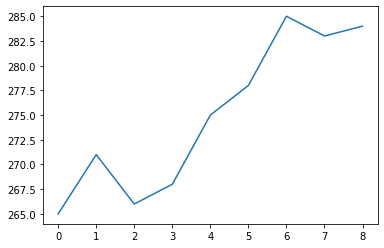

In [11]:
res_hrh = [sum(i)//9 for i in zip(*n_cell)]
plt.plot(res_hrh)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

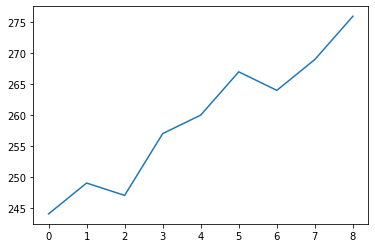

In [107]:
res_adr = [sum(i)//9 for i in zip(*n_cell)]
plt.plot(res_adr)
plt.show

In [95]:
res_cont = [sum(i)//9 for i in zip(*n_cell)]

<function matplotlib.pyplot.show(*args, **kw)>

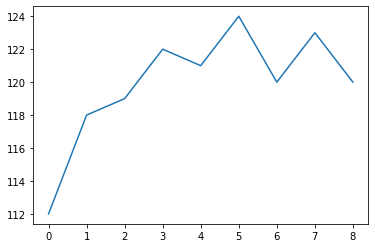

In [96]:
plt.plot(res_cont)
plt.show

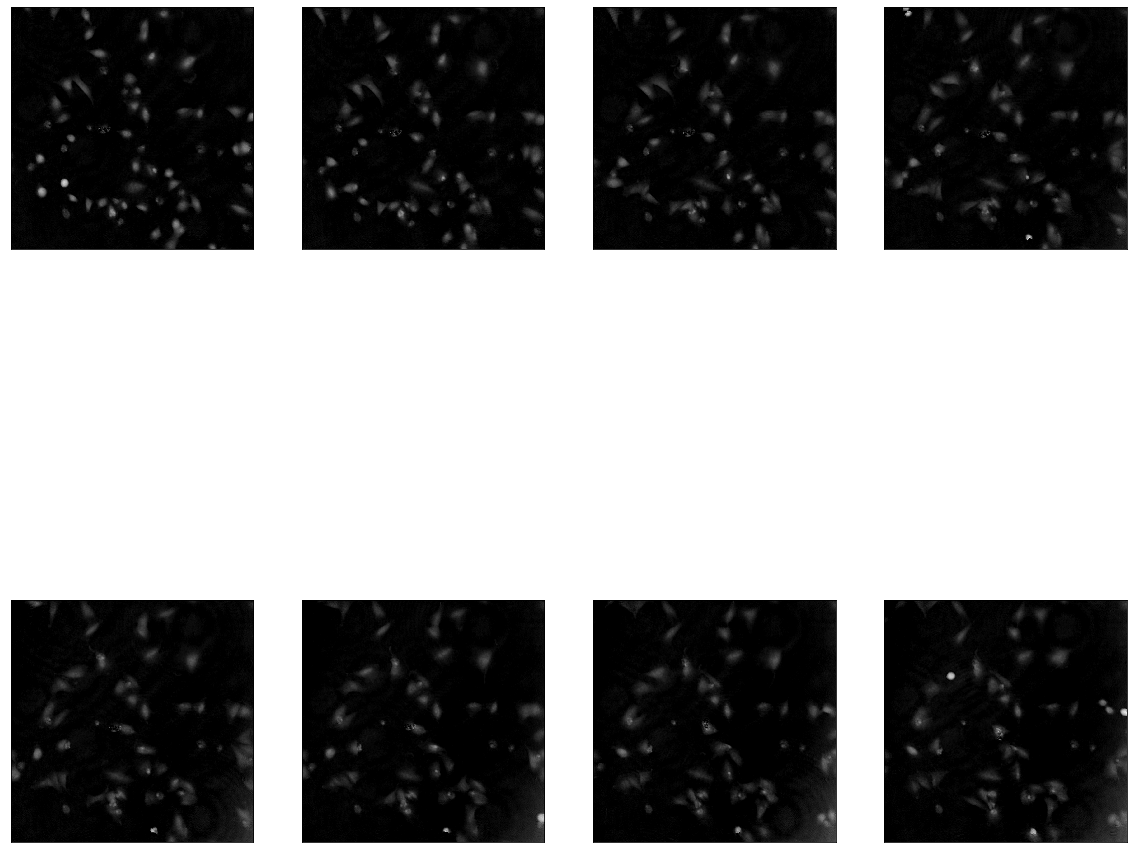

In [12]:
fig = plt.figure(figsize=(20, 20))


for i in range(8):
    ax = fig.add_subplot(2,4,i+1),plt.imshow(i_list[36][i],'gray')
    #plt.title(titles[i], color='white')
    plt.xticks([]),plt.yticks([])
plt.show()